In [10]:
import sys
sys.path.insert(0, '..')

# Obtención de reportes

In [11]:
import controllers as c

In [12]:
reports = c.get_reports(limit=900)
len(reports), reports[:5]

(900,
  <models.Report at 0x7f6908564190>])

In [13]:
columns = [c for c in list(reports[0].__dict__.keys()) if c != '_id']
columns

['report_id',
 'creation_time',
 'status',
 'component',
 'dupe_of',
 'summary',
 'comments']

In [14]:
import pandas as pd

In [15]:
df_reports = pd.DataFrame(columns=columns, data=[r.__dict__ for r in reports])
df_masters = df_reports[df_reports['dupe_of'].isnull()]
df_duplicate = df_reports[df_reports['dupe_of'].notnull()]
df_reports.head()

,report_id,creation_time,status,component,dupe_of,summary,comments
0,1775851,2022-06-22 20:30:23,NEW,New Tab Page,NaN,Intermittent browser/components/newtab/test/br...,
1,1775776,2022-06-22 20:08:18,NEW,Protections UI,NaN,Intermittent browser/components/protections/te...,
2,1775671,2022-06-22 19:38:28,NEW,Toolbars and Customization,NaN,Intermittent browser/components/customizableui...,
3,1775632,2022-06-22 19:28:36,NEW,Tabbed Browser,NaN,Intermittent browser/base/content/test/perform...,
4,1771460,2022-05-27 09:21:04,RESOLVED,General,NaN,Conflicting global variable and lazy getter,There are some case that `Services` is importe...


# Graficar las variables disponibles

## Distribución de duplicados y maestros

329 duplicates, 571 masters


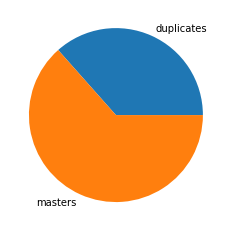

In [16]:
# Plot duplicates number and masters number
import matplotlib.pyplot as plt
plt.pie([len(df_duplicate), len(df_masters)], labels=['duplicates', 'masters'])
print(f"{len(df_duplicate)} duplicates, {len(df_masters)} masters")
plt.show()

## Frecuencias de 'status' y 'component'

/tmp/ipykernel_37837/243318724.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(x1_axis, rotation=90)
/tmp/ipykernel_37837/243318724.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(x2_axis, rotation=90)


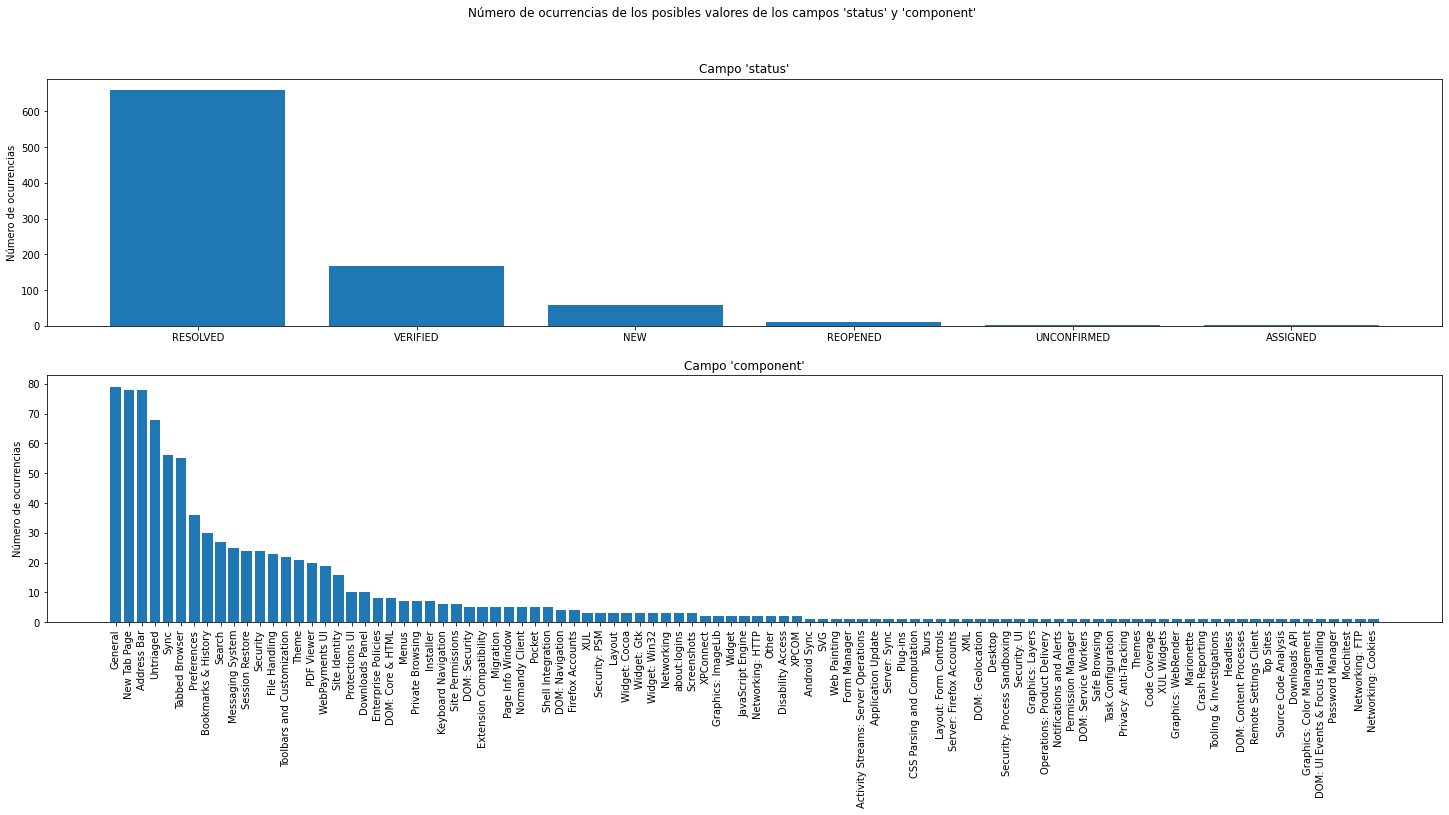

In [17]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(25, 10))
fig.suptitle("Número de ocurrencias de los posibles valores de los campos 'status' y 'component'")

x1_axis = df_reports['status'].value_counts().index
y1_axis = df_reports['status'].value_counts().values
ax1.bar(x1_axis, y1_axis)
ax1.set_title("Campo 'status'")
ax2.set_xticklabels(x1_axis, rotation=90)
ax1.set_ylabel('Número de ocurrencias')

x2_axis = df_reports['component'].value_counts().index
y2_axis = df_reports['component'].value_counts().values
ax2.bar(x2_axis, y2_axis)
ax2.set_title("Campo 'component'")
ax2.set_xticklabels(x2_axis, rotation=90)
ax2.set_ylabel('Número de ocurrencias')

plt.show()

## Longitudes de los campos de texto

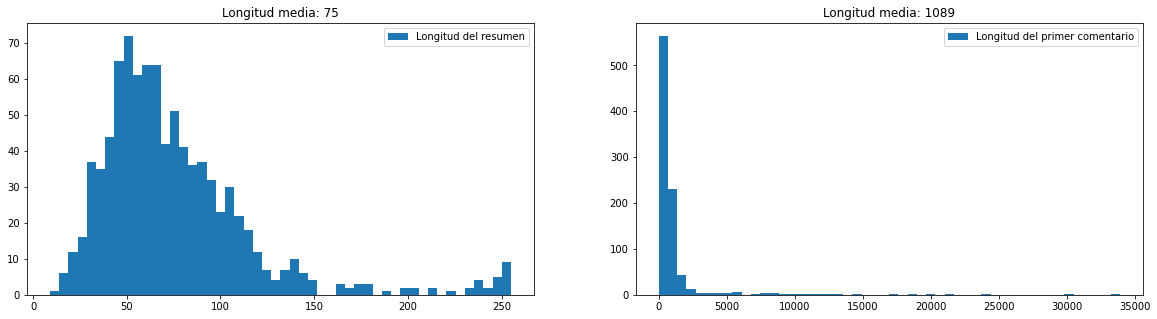

In [18]:
df_reports['len_summary'] =  [len(s) for s in df_reports['summary']]
df_reports['len_comments'] = [len(s) for s in df_reports['comments']]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

ax1.hist(df_reports['len_summary'], bins=50, label='Longitud del resumen')
ax1.legend()
ax1.set_title(f"Longitud media: {int(df_reports['len_summary'].mean())}")

ax2.hist(df_reports['len_comments'], bins=50, label='Longitud del primer comentario')
ax2.legend()
ax2.set_title(f"Longitud media: {int(df_reports['len_comments'].mean())}")

plt.show()

### Valores anómalos

#### Por arriba

In [19]:
high_summary_anomalies = df_reports[df_reports['len_summary'] > 150]
high_comments_anomalies = df_reports[df_reports['len_comments'] > 2500]
print(f"Número de anomalías en resumen: {len(high_summary_anomalies)}")
print(f"Número de anomalías en comentarios: {len(high_comments_anomalies)}")

Número de anomalías en resumen: 41
Número de anomalías en comentarios: 54


In [20]:
for summary in high_summary_anomalies['summary'][:5]:
    print(summary)
    print('-'*50)

Intermittent <random test> | A promise chain failed to handle a rejection: Component returned failure code: 0x80004002 (NS_NOINTERFACE) [nsIInterfaceRequestor.getInterface] - stack: getFindSelection@chrome://browser/content/preferences/findInPage.js:215:8
--------------------------------------------------
Intermittent browser/base/content/test/tabs/browser_origin_attrs_in_remote_type.js | A promise chain failed to handle a rejection: Component returned failure code: 0x80004002 (NS_NOINTERFACE) [nsIInterfaceRequestor.getInterface] - stack: getFindSelection@
--------------------------------------------------
Intermittent browser/modules/test/browser/browser_PermissionUI.js | A promise chain failed to handle a rejection: engine is null - stack: _updateURLBarPlaceholder@chrome://browser/content/browser.js:4138:9
--------------------------------------------------
Intermittent toolkit/components/httpsonlyerror/tests/browser/browser_errorpage.js | Uncaught exception - at resource://specialpow

In [21]:
# for comment in comments_anomalies['comments']:
#     print(comment)
#     print('-'*50)

In [22]:
print([len(comment) for comment in high_comments_anomalies['comments']])

[13105, 8295, 2760, 14656, 5599, 23843, 4107, 3965, 3403, 3072, 6793, 3547, 21091, 29980, 5073, 23738, 18606, 8959, 7995, 7956, 7220, 7880, 10110, 2625, 8523, 19992, 10827, 4565, 4565, 5329, 12239, 11767, 33904, 6033, 5645, 5497, 2796, 4007, 8596, 5485, 11324, 17056, 4757, 9331, 3303, 4980, 7995, 2693, 4372, 7874, 2601, 2676, 5934, 5502]


#### Por abajo

In [23]:
low_summary_anomalies = df_reports[df_reports['len_summary'] < 30]
low_comments_anomalies = df_reports[df_reports['len_comments'] < 30]
print(f"Número de anomalías en resumen: {len(low_summary_anomalies)}")
print(f"Número de anomalías en comentarios: {len(low_comments_anomalies)}")

Número de anomalías en resumen: 45
Número de anomalías en comentarios: 27


In [24]:
for summary in low_summary_anomalies['summary'][:10]:
    print(summary)
    print('-'*50)

Polish modal design for MR1
--------------------------------------------------
Incorrect first tab rendering
--------------------------------------------------
Make modal dialog text bigger
--------------------------------------------------
Some addons not syncing
--------------------------------------------------
Some addons not syncing
--------------------------------------------------
URL Link Exploit
--------------------------------------------------
Remove the SSB feature #2
--------------------------------------------------
Crash in [@ OOM | small]
--------------------------------------------------
scrolling screenshot
--------------------------------------------------
Remove the SSB feature
--------------------------------------------------


In [25]:
for comment in low_comments_anomalies['comments'][:10]:
    print(comment)
    print('-'*50)


--------------------------------------------------

--------------------------------------------------

--------------------------------------------------

--------------------------------------------------

--------------------------------------------------

--------------------------------------------------

--------------------------------------------------

--------------------------------------------------

--------------------------------------------------

--------------------------------------------------


### Cadenas vacías

In [26]:
# Get percentage of empty strings in summary and comments
df_reports['empty_summary'] = [s == '' for s in df_reports['summary']]
df_reports['empty_comments'] = [s == '' for s in df_reports['comments']]

In [27]:
df_reports['empty_summary'].value_counts()

False    900
Name: empty_summary, dtype: int64

In [28]:
df_reports['empty_comments'].value_counts()

False    874
True      26
Name: empty_comments, dtype: int64

# Exploración de datos

In [29]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /home/ajburri/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [30]:
df_reports['summary_tokens'] = [word_tokenize(s) for s in df_reports['summary']]
df_reports['comments_tokens'] = [word_tokenize(s) for s in df_reports['comments']]

In [31]:
unique_summary_tokens = set([w for s in df_reports['summary_tokens'] for w in s])
unique_comments_tokens = set([w for s in df_reports['comments_tokens'] for w in s])

In [32]:
print(f"Número de tokens únicaos en resumen: {len(unique_summary_tokens)}")
print(f"Número de tokens únicaos en comentarios: {len(unique_comments_tokens)}")

Número de tokens únicaos en resumen: 2896
Número de tokens únicaos en comentarios: 14734


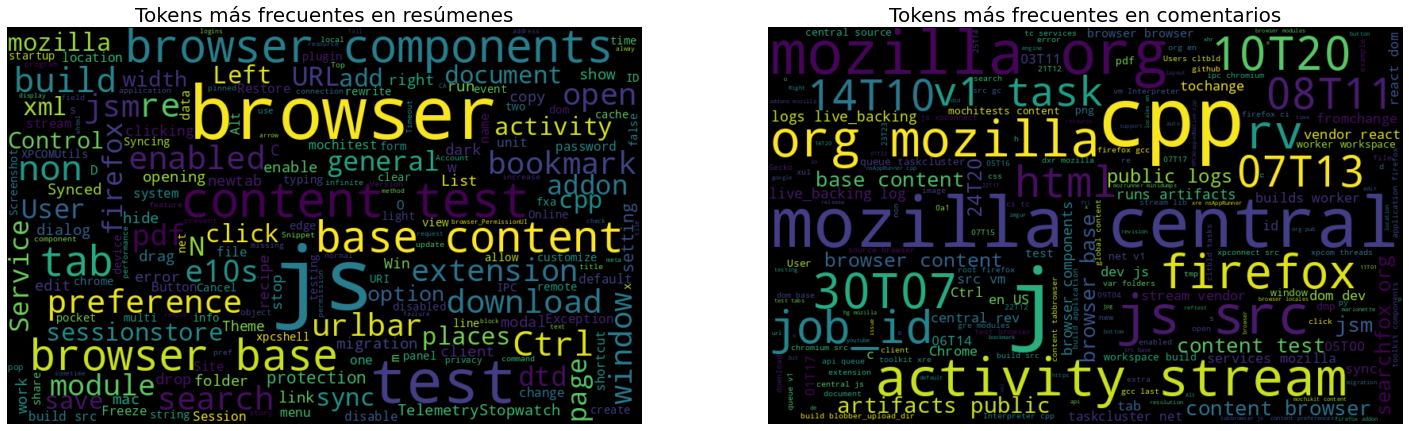

In [33]:
from wordcloud import WordCloud
summary_wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(' '.join(unique_summary_tokens))
comments_wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(' '.join(unique_comments_tokens))

# Plot in same axis, different graphs
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 15))
ax1.imshow(summary_wordcloud, interpolation='bilinear')
ax1.axis("off")
ax1.set_title('Tokens más frecuentes en resúmenes', fontsize=20)
ax2.imshow(comments_wordcloud, interpolation='bilinear')
ax2.axis("off")
ax2.set_title('Tokens más frecuentes en comentarios', fontsize=20)
plt.show()

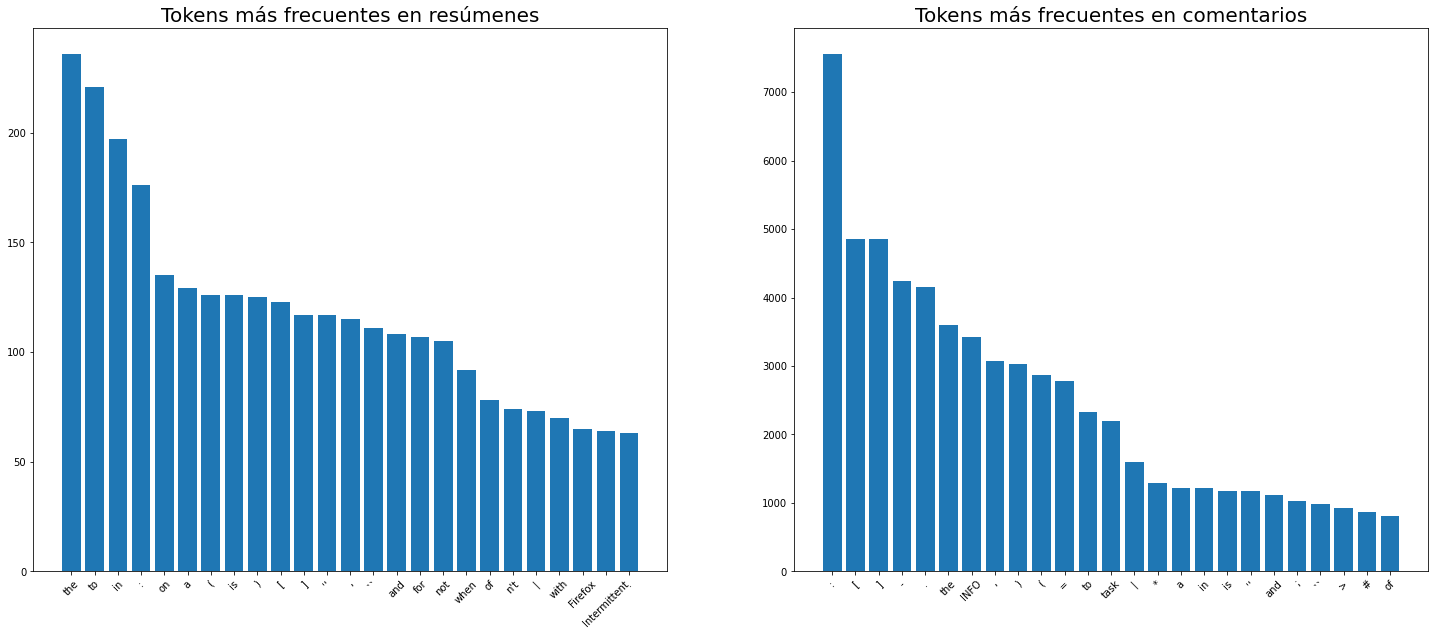

In [34]:
from collections import Counter

summary_counter = Counter(w for s in df_reports['summary_tokens'] for w in s)
comments_counter = Counter(w for s in df_reports['comments_tokens'] for w in s)

summary_counter_25 = summary_counter.most_common(25)
comments_counter_25 = comments_counter.most_common(25)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 10))

ax1.bar(range(len(summary_counter_25)), [count for word, count in summary_counter_25], align='center')
ax1.set_xticks(range(len(summary_counter_25)))
ax1.set_xticklabels([word for word, count in summary_counter_25], rotation=45)
ax1.set_title('Tokens más frecuentes en resúmenes', fontsize=20)

ax2.bar(range(len(comments_counter_25)), [count for word, count in comments_counter_25], align='center')
ax2.set_xticks(range(len(comments_counter_25)))
ax2.set_xticklabels([word for word, count in comments_counter_25], rotation=45)
ax2.set_title('Tokens más frecuentes en comentarios', fontsize=20)

plt.show()

# Pequeño preprocesamiento

In [35]:
from nltk.corpus import stopwords
from string import punctuation
from nltk.stem import SnowballStemmer

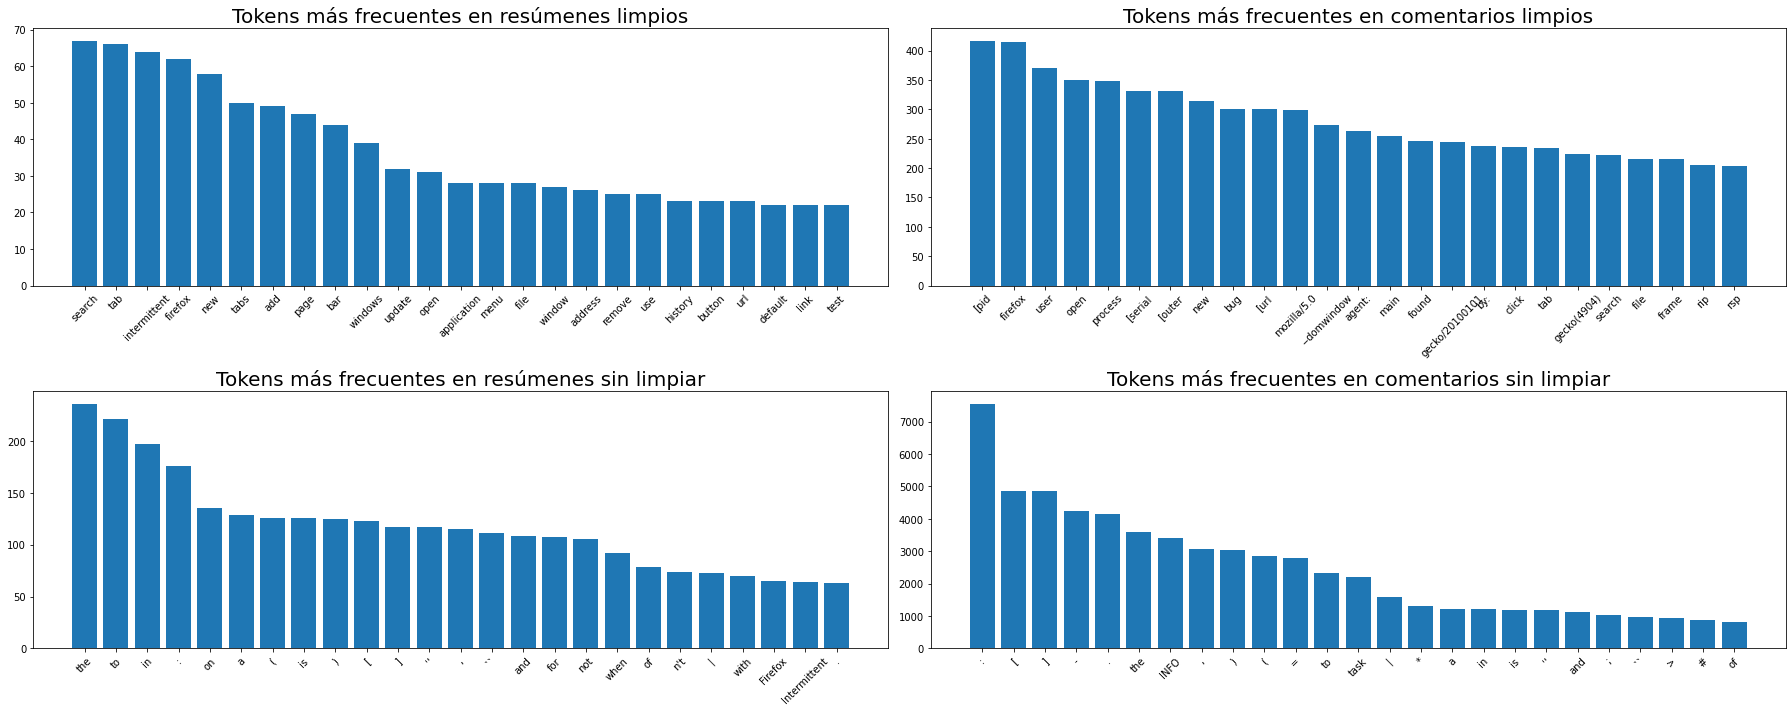

In [39]:
from nltk.corpus import stopwords
from string import punctuation
from nltk.stem import SnowballStemmer

stemmer = SnowballStemmer('english')
CUSTOM_STOPWORDS = ['info', '==', '', ' ']

def clean_text(text):
    text = text.lower()
    text = text.split(' ')
    tokens = [w for w in text if w not in stopwords.words('english') and w not in list(punctuation) and w not in CUSTOM_STOPWORDS]
    # tokens = [stemmer.stem(w) for w in tokens]
    return tokens

df_reports['summary_clean_tokens'] = [clean_text(s) for s in df_reports['summary']]
df_reports['comments_clean_tokens'] = [clean_text(s) for s in df_reports['comments']]

clean_summary_counter = Counter(w for s in df_reports['summary_clean_tokens'] for w in s)
clean_comments_counter = Counter(w for s in df_reports['comments_clean_tokens'] for w in s)

clean_summary_counter_25 = clean_summary_counter.most_common(25)
clean_comments_counter_25 = clean_comments_counter.most_common(25)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(25, 10))

ax1.bar(range(len(clean_summary_counter_25)), [count for word, count in clean_summary_counter_25], align='center')
ax1.set_xticks(range(len(clean_summary_counter_25)))
ax1.set_xticklabels([word for word, count in clean_summary_counter_25], rotation=45)
ax1.set_title('Tokens más frecuentes en resúmenes limpios', fontsize=20)

ax2.bar(range(len(clean_comments_counter_25)), [count for word, count in clean_comments_counter_25], align='center')
ax2.set_xticks(range(len(clean_comments_counter_25)))
ax2.set_xticklabels([word for word, count in clean_comments_counter_25], rotation=45)
ax2.set_title('Tokens más frecuentes en comentarios limpios', fontsize=20)

ax3.bar(range(len(summary_counter_25)), [count for word, count in summary_counter_25], align='center')
ax3.set_xticks(range(len(summary_counter_25)))
ax3.set_xticklabels([word for word, count in summary_counter_25], rotation=45)
ax3.set_title('Tokens más frecuentes en resúmenes sin limpiar', fontsize=20)

ax4.bar(range(len(comments_counter_25)), [count for word, count in comments_counter_25], align='center')
ax4.set_xticks(range(len(comments_counter_25)))
ax4.set_xticklabels([word for word, count in comments_counter_25], rotation=45)
ax4.set_title('Tokens más frecuentes en comentarios sin limpiar', fontsize=20)

fig.tight_layout()
plt.show()

# Evaluación por pares

Se trata de ver similaridades entre las parejas de duplicado - master